# Module 05, 06 & 07 Assignment
## Understanding the ML Problem, Exploratory Data Analysis (EDA) and Basic Preprocessing
**Dataset:** Titanic – Machine Learning from Disaster (Kaggle)

Download the **train.csv** file from Kaggle’s Titanic competition and upload it to this notebook. Rename it to `titanic.csv` or update the file name in the loading cell.
Dataset link: https://www.kaggle.com/datasets/yasserh/titanic-dataset

Total Marks: **100**

### Instructions
- This assignment covers:
  - **Module 05:** Basic ML problem framing (features, target, task type).
  - **Module 06:** Exploratory Data Analysis (EDA).
  - **Module 07:** Basic Preprocessing (handling missing values, encoding, scaling).
- Answer all questions inside this notebook using code and markdown.
- Do not delete the original question texts.
- At the end, the notebook should run from top to bottom without errors.

In [5]:
# ==============================
# Setup
# ==============================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (8, 5)

print("Libraries imported.")

Libraries imported.


---
## Part 0: Understanding the ML Problem (Module 05) – 10 marks

### 0.1 Load the Dataset and Inspect (5 marks)
**Tasks:**
1. Load `titanic.csv` into a pandas DataFrame.
2. Show `.head()`, `.info()`, and `.describe()`.
3. Briefly look at the column names and data types.


In [13]:
# 0.1 Load the Dataset and Inspect
# TODO: Change file name if needed.

df = pd.read_csv("titanic.csv")#Download the .csv file from Kaggle

print("Shape of dataset:", df.shape)
display(df.head())

print("\nInfo:")
print(df.info())

print("\nDescribe (numeric columns):")
display(df.describe())

Shape of dataset: (891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S



Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

Describe (numeric columns):


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### 0.2 Identify Features, Target and Task Type (5 marks)
**Tasks:**
Based on the dataset:
1. Identify the **target variable** for a predictive model.
2. List at least **5 potential feature columns** you could use.
3. State whether this is a **classification** or **regression** problem, and explain **why**.

Write your answers below.


#### **Your answers**
- Target variable: `Survived` (1 = lived, 0 = died).
- Feature columns (at least 5): `Pclass`, `Sex`, `Age`, `Fare`, `SibSp`, `Parch`, `Embarked`.
- Is this classification or regression, and why?: Classification, because `Survived` is a binary category and so we need to classify each passenger into one of two discrete classes rather than predict a continuous value.

---
## Part A: Exploratory Data Analysis (EDA) – 45 marks

### 1. Initial Exploration and Cleaning Decisions (10 marks)
**Tasks:**
1. Show the number of unique values in each column.
2. Identify columns that are clearly **IDs or high-cardinality text** (for example, `PassengerId`, `Name`, `Ticket`).
3. Decide which of these columns you will **drop** for the rest of the analysis and justify in 2–3 sentences.


In [14]:
# 1. Initial Exploration and Cleaning Decisions (Task 1 is given)
print("Unique values per column:")
for col in df.columns:
    print(col, ":", df[col].nunique())

# Drop high-cardinality / ID-like columns
id_high_card_cols = ["PassengerId", "Name", "Ticket"]
# df = df.drop(columns=id_high_card_cols)
print("\nDropped columns:", id_high_card_cols)

Unique values per column:
PassengerId : 891
Survived : 2
Pclass : 3
Name : 891
Sex : 2
Age : 88
SibSp : 7
Parch : 7
Ticket : 681
Fare : 248
Cabin : 147
Embarked : 3

Dropped columns: ['PassengerId', 'Name', 'Ticket']


#### Columns to drop and justification
- Columns dropped:  
- Justification (2–3 sentences):  

---
### 2. Univariate Analysis (15 marks)
**Tasks:**
- Plot histograms for numeric features: `Age`, `Fare`, `SibSp`, `Parch`.
- Plot countplots for categorical features: `Sex`, `Pclass`, `Embarked`.
- Write **two to three insights** about the distributions and any obvious patterns.


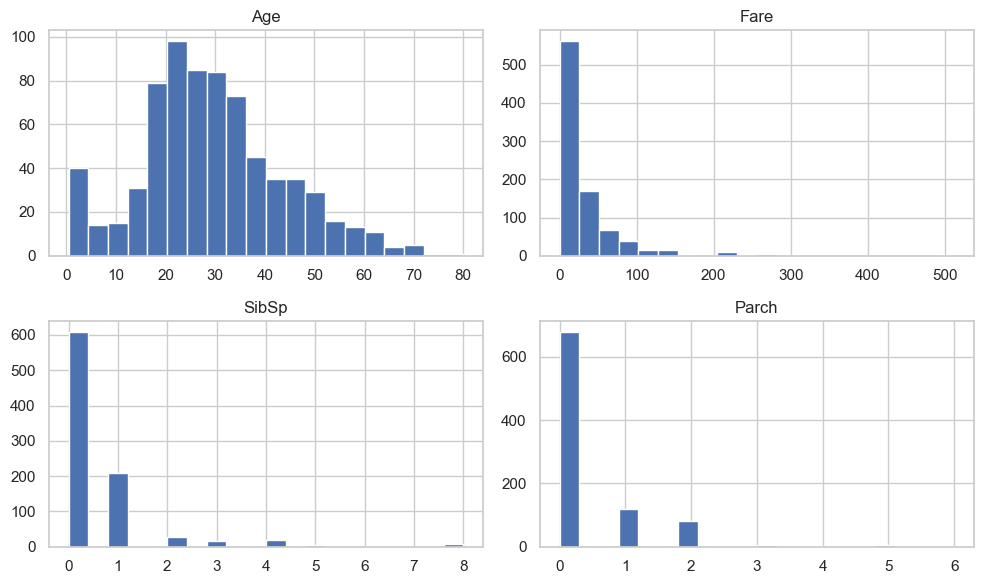

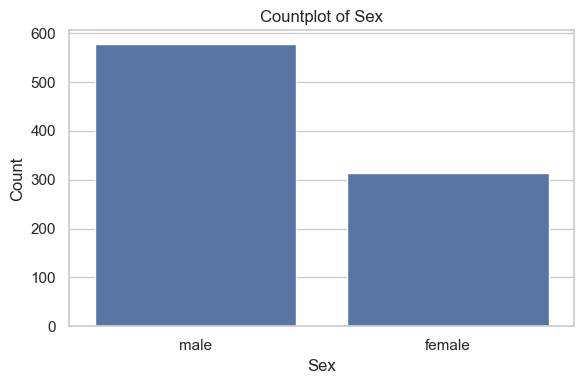

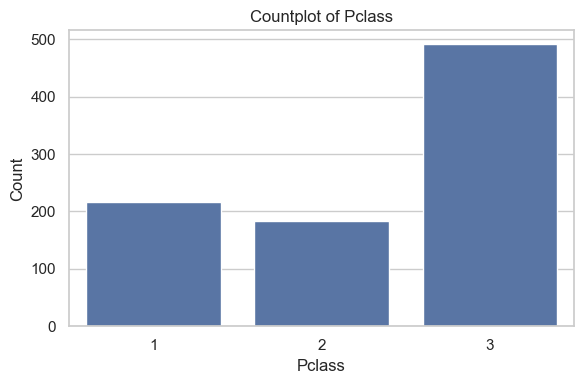

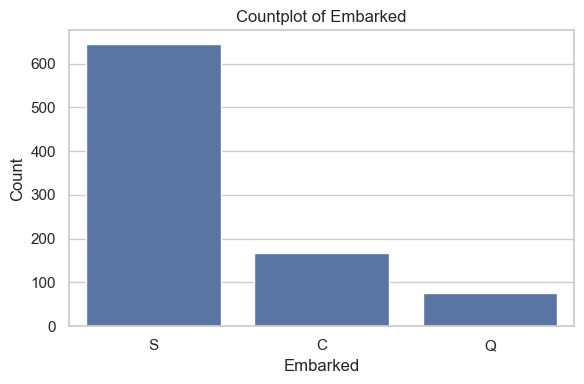

In [ ]:
# 2. Univariate Analysis

numeric_cols = ["Age", "Fare", "SibSp", "Parch"]

# Histograms code is written for you
df[numeric_cols].hist(bins=20, figsize=(10, 6))
plt.tight_layout()
plt.show()

# Write Countplots code for key categorical variables [You need to complete]
cat_cols = ["Sex", "Pclass", "Embarked"]

for c in cat_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x=c)
    plt.title(f"Countplot of {c}")
    plt.xlabel(c)
    plt.ylabel("Count")
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()

#### Write Your insights
- Insight 1: Most passengers are in 3rd class and embarked from port S 
- Insight 2: Sex distribution is male-dominant
- Insight 3: SibSp and Parch are concentrated at 0, indicating many passengers traveled alone

---
### 3. Bivariate Analysis with Target (15 marks)
Use `Survived` as the target variable.

**Tasks:**
- Compute and plot a **correlation heatmap** for numeric features, including `Survived`.
- Create a **pairplot** for: `Age`, `Fare`, `SibSp`, `Parch`, and `Survived`.
- Write **two to three insights**, including which variables seem associated with survival.


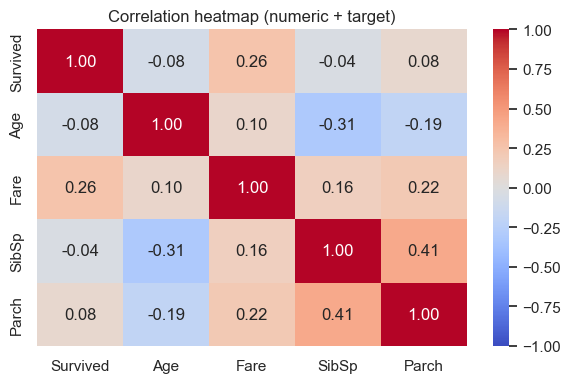

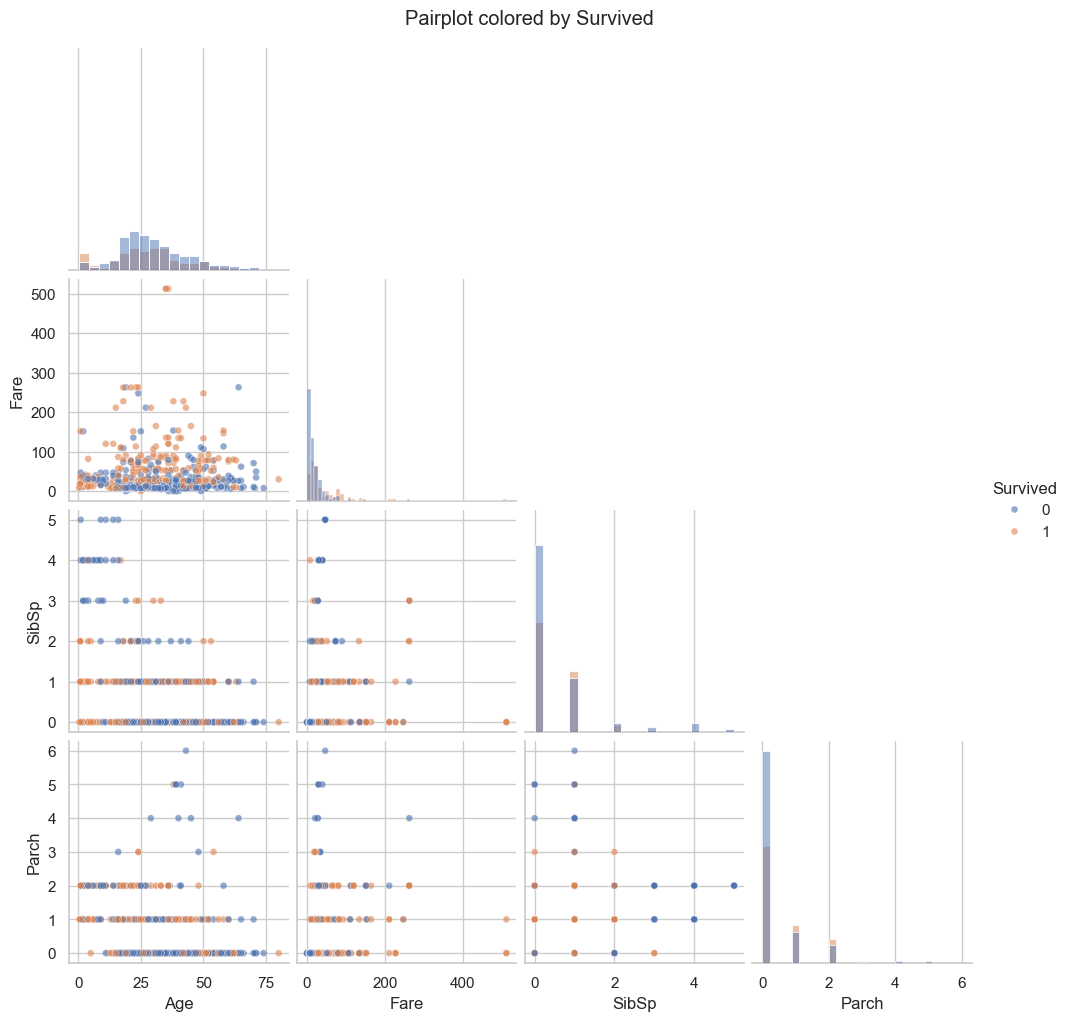

In [17]:
# 3. Bivariate Analysis with Target

num_for_corr = ["Survived", "Age", "Fare", "SibSp", "Parch"]
## Complete this code block to generate correlation heatmap and pairplot [You need to complete]

# Correlation heatmap
corr = df[num_for_corr].corr()
plt.figure(figsize=(6, 4))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", vmin=-1, vmax=1)
plt.title("Correlation heatmap (numeric + target)")
plt.tight_layout()
plt.show()

# Pairplot (hue by Survived); drop rows with NaNs for clean plotting
pp_df = df[num_for_corr].dropna()
sns.pairplot(
    data=pp_df,
    vars=["Age", "Fare", "SibSp", "Parch"],
    hue="Survived",
    diag_kind="hist",
    corner=True,
    plot_kws={"alpha": 0.6, "s": 25}
)
plt.suptitle("Pairplot colored by Survived", y=1.02)
plt.show()

#### Your insights
- Insight 1: Higher Fare shows a positive association with survival
- Insight 2: younger passengers appear slightly more likely to survive

---
### 4. Categorical vs Target Analysis (5 marks)
**Tasks:**
For each of the following categorical features: `Sex`, `Pclass`, `Embarked`:
- Plot a **bar chart** showing the proportion of passengers who survived in each category.
- Write **two short insights** about which categories have higher or lower survival chances.



Survival proportion by Sex:


Survived,0,1
Sex,,
female,0.257962,0.742038
male,0.811092,0.188908


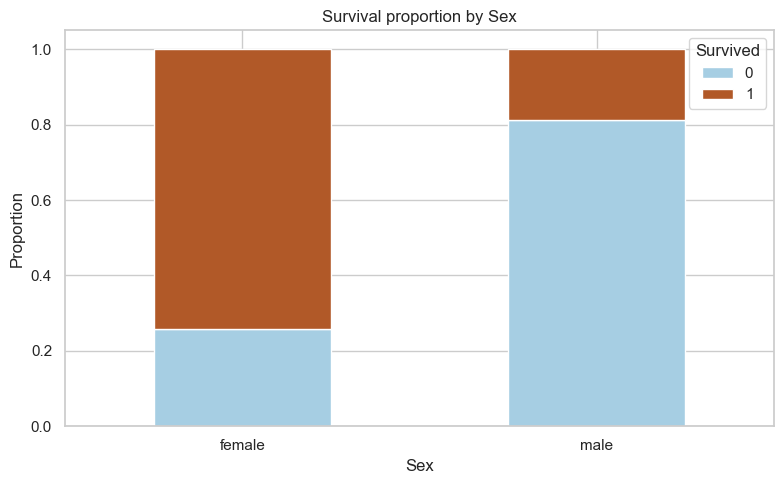


Survival proportion by Pclass:


Survived,0,1
Pclass,,
1,0.370370,0.629630
2,0.527174,0.472826
3,0.757637,0.242363


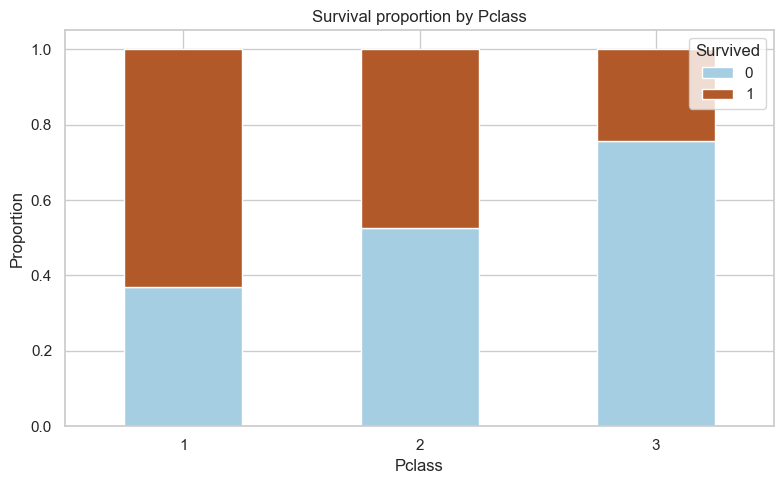


Survival proportion by Embarked:


Survived,0,1
Embarked,,
C,0.446429,0.553571
Q,0.610390,0.389610
S,0.663043,0.336957


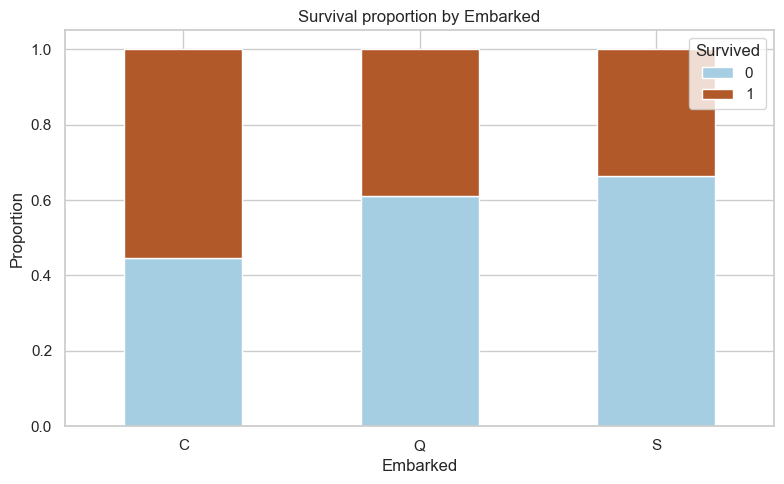

In [18]:
# 4. Categorical vs Target Analysis [Bar chart code is written for you]

cat_target_cols = ["Sex", "Pclass", "Embarked"]

for c in cat_target_cols:
    ct = pd.crosstab(df[c], df["Survived"], normalize="index")
    print(f"\nSurvival proportion by {c}:")
    display(ct)
    ct.plot(kind="bar", stacked=True, colormap="Paired")
    plt.title(f"Survival proportion by {c}")
    plt.ylabel("Proportion")
    plt.xlabel(c)
    plt.xticks(rotation=0)
    plt.legend(title="Survived", loc="upper right")
    plt.tight_layout()
    plt.show()

#### Your insights
- Insight 1:  
- Insight 2:  

---
## Part B: Basic Data Preprocessing – 45 marks

Focus: **Handling missing values, encoding categorical variables, and scaling numeric features.**

### 5. Handling Missing Values (15 marks)
**Tasks:**
1. Show the count of missing values in each column.
2. Decide how to handle missing values for:
   - `Age` (numeric)
   - `Embarked` (categorical)
   - `Cabin` (many missing values)
3. Implement your chosen strategy in code.
4. Show missing value counts again to confirm.
5. Explain your choices in **3–4 sentences**.


In [19]:
# 5. Handling Missing Values

print("Missing values before:") #[Task 1 is done for you]
print(df.isna().sum())

# Drop Cabin (Complete this code block)
if "Cabin" in df.columns:
    df = df.drop(columns=["Cabin"])

# Fill Age (use group median by Sex and Pclass; fallback to overall median)
age_group_median = df.groupby(["Sex", "Pclass"])["Age"].transform("median")
df["Age"] = df["Age"].fillna(age_group_median)
df["Age"] = df["Age"].fillna(df["Age"].median())

# Fill Embarked (mode)
if df["Embarked"].isna().any():
    emb_mode = df["Embarked"].mode(dropna=True)[0]
    df["Embarked"] = df["Embarked"].fillna(emb_mode)


print("\nMissing values after handling:")
print(df.isna().sum())

Missing values before:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Missing values after handling:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


#### Explanation of your strategy
- Why you dropped or kept `Cabin`:  
- Why you used median/mean for `Age`:  
- Why you used mode or another method for `Embarked`:  

---
### 6. Encoding Categorical Variables (15 marks)
Focus on the following categorical features:
- `Sex`
- `Embarked`
- `Pclass` (treat as categorical)

**Tasks:**
- Use `OneHotEncoder` from sklearn to encode these features.
- Keep `Survived` and the main numeric features (`Age`, `Fare`, `SibSp`, `Parch`).
- Show the shape and head of the encoded DataFrame.


In [22]:
# 6. Encoding Categorical Variables

df_enc = df.copy()

# Select features for encoding and keep important numeric ones
cat_features = ["Sex", "Embarked", "Pclass"]
numeric_features = ["Age", "Fare", "SibSp", "Parch"]
target_col = "Survived"

# One hot encode categorical variables [You need to do]
df_enc[cat_features] = df_enc[cat_features].astype("category")
ohe = OneHotEncoder(handle_unknown="ignore", sparse_output=False)
encoded_arr = ohe.fit_transform(df_enc[cat_features])
encoded_cols = ohe.get_feature_names_out(cat_features)
encoded_df = pd.DataFrame(encoded_arr, columns=encoded_cols, index=df_enc.index)

# Build final encoded DataFrame
df_model = pd.concat([
    df_enc[[target_col] + numeric_features],
    encoded_df
], axis=1)

print("Shape after encoding:", df_model.shape)
display(df_model.head())

Shape after encoding: (891, 13)


,Survived,Age,Fare,SibSp,Parch,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,0,22.0,7.2500,1,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1,1,38.0,71.2833,1,0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,1,26.0,7.9250,0,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,1,35.0,53.1000,1,0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4,0,35.0,8.0500,0,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0


---
### 7. Scaling Numeric Features (15 marks)
**Tasks:**
- Use `StandardScaler` on the numeric features: `Age`, `Fare`, `SibSp`, `Parch`.
- Plot boxplots of these features **before** and **after** scaling.
- Write **two sentences** explaining how scaling changes the numeric values and why it is useful before training some ML models.


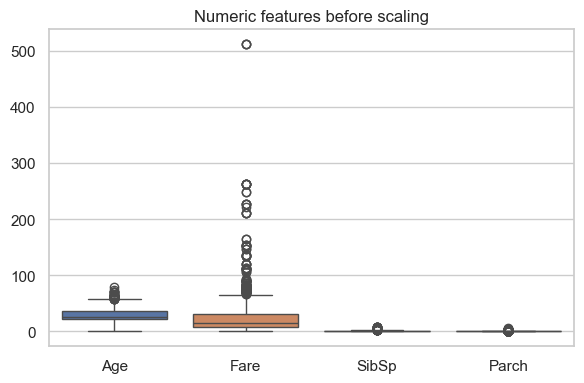

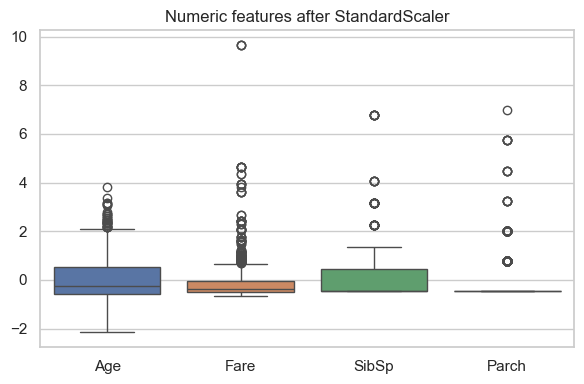

In [23]:
# 7. Scaling Numeric Features

score_cols = ["Age", "Fare", "SibSp", "Parch"]

# Boxplot before scaling
plt.figure(figsize=(6, 4))
sns.boxplot(data=df_model[score_cols])
plt.title("Numeric features before scaling")
plt.tight_layout()
plt.show()

# Apply StandardScaler [You need to do]
scaler = StandardScaler()
df_scaled = df_model.copy()
df_scaled[score_cols] = scaler.fit_transform(df_model[score_cols])


# Boxplot after scaling
plt.figure(figsize=(6, 4))
sns.boxplot(data=df_scaled[score_cols])
plt.title("Numeric features after StandardScaler")
plt.tight_layout()
plt.show()

#### Your observations on scaling
- Sentence 1:  
- Sentence 2:  

---
### 8. Simple Feature Quality Check (5 marks)
**Tasks:**
- Show `.info()` of the final processed DataFrame (`df_scaled`).
- Confirm there are no missing values.
- Confirm that all remaining features are numeric and suitable for most ML models.
- Write **one short concluding remark** about dataset readiness.


In [ ]:
# 8. Simple Feature Quality Check
print(df_scaled.info())

print("\nTotal missing values in final DataFrame:", df_scaled.isna().sum().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Age         891 non-null    float64
 2   Fare        891 non-null    float64
 3   SibSp       891 non-null    float64
 4   Parch       891 non-null    float64
 5   Sex_female  891 non-null    float64
 6   Sex_male    891 non-null    float64
 7   Embarked_C  891 non-null    float64
 8   Embarked_Q  891 non-null    float64
 9   Embarked_S  891 non-null    float64
 10  Pclass_1    891 non-null    float64
 11  Pclass_2    891 non-null    float64
 12  Pclass_3    891 non-null    float64
dtypes: float64(12), int64(1)
memory usage: 90.6 KB
None

Total missing values in final DataFrame: 0


#### Final remark on dataset readiness
All features are numeric with no missing values; the dataset is clean and ready for model training.

---
## Submission
- Run all cells from top to bottom to make sure everything works.
- Set the Colab file's shareable link to ‘Anyone with the link’ and ‘View’ access, then submit it in the Phitron Assignment module's Assignment submission section.